# Jupyter Notebook for Problem Set 03
Troubleshooting: **Kernel -> Restart and Clear Output** resets the notebook state.

## Plotting Stability Diagrams: Example 1
Bifurcations occur at **non-hyperbolic fixed points**, i.e. parameter values where the equilibrium condition and the zero-eigenvalue condition hold simultaneously:
- $f(x)=0$ (fixed point), and
- $f'(x)=0$ (non-hyperbolic).

Because we have two equations, we can typically solve for **two unknowns** in terms of the remaining one(s). In the example below, the unknowns are $x$, $a$, and $r$.

- Below, we solve for each variable in terms of the other two.
- Notice that when solving for $x$ and $r$ in terms of $a$, SymPy returns two solution branches. One of these corresponds to the degenerate branch $x=0$ with $r=0$ (and $a$ free), which may not show up in the other solve commands depending on how the equations are rearranged.


In [1]:
import sympy as sym
from sympy.plotting import plot_parametric


# Solve the equilibrium and non-hyperbolicity conditions simultaneously
x = sym.symbols('x')
a = sym.symbols('a')
r = sym.symbols('r')

eq1 = sym.Eq(0, r*x - a*x**2 - x**3) # fixed point
eq2 = sym.Eq(0, sym.diff(r*x - a*x**2 - x**3, x)) # non-hyperbolic

roots_xr = sym.solve([eq1, eq2], (x, r)) # solve in terms of a
roots_xa = sym.solve([eq1, eq2], (x, a)) # solve in terms of r
roots_ra = sym.solve([eq1, eq2], (r, a)) # solve in terms of x

print("Solutions for (x, r):", roots_xr)
print("Solutions for (x, a):", roots_xa)
print("Solutions for (r, a):", roots_ra)

Solutions for (x, r): [(0, 0), (-a/2, -a**2/4)]
Solutions for (x, a): [(sqrt(-r), -2*sqrt(-r)), (-sqrt(-r), 2*sqrt(-r))]
Solutions for (r, a): {a: -2*x, r: -x**2}


I plot the solution from `roots_ra` and the first solution from `roots_xr` using parametric plot.

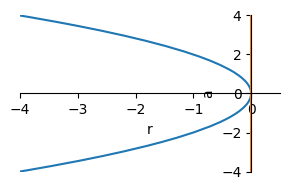

In [2]:
# Parametric plots of solution branches in the (r,a) plane,
# using x as the parameter.
# There is a bifurcation at x = 0, r = 0 for any a.
#   That bifurcation curve is a vertical line in (r,a) space.
#   To form the vertical line, I set r = 0, a = x.
from sympy.plotting import plot_parametric

plot_parametric(
    (-x**2, -2*x),       # branch: r = -x^2, a = -2x
    (0, x),             # branch: vertical line at r=0
    (x, -4, 4),
    xlim=(-4,0.5),
    ylim=(-4,4),
    xlabel='r',
    ylabel='a',
    size=(3, 2)
)

## Plotting Stability Diagrams: Example 2

In [3]:
eq1 = sym.Eq(0, a + r*x - x**3) # fixed pts
eq2 = sym.Eq(0, sym.diff(a + r*x - x**3, x) ) # non-hyperbolic
roots_xr = sym.solve([eq1,eq2],(x,r))
roots_xa = sym.solve([eq1,eq2],(x,a))
roots_ra = sym.solve([eq1,eq2],(r,a))
print(roots_xr)
print(roots_xa)
print(roots_ra)

[(-2**(2/3)*(a**2)**(2/3)/(2*a), 3*2**(1/3)*(a**2)**(1/3)/2), (2**(2/3)*(1 - sqrt(3)*I)*(a**2)**(2/3)/(4*a), 3*2**(1/3)*(-1 - sqrt(3)*I)*(a**2)**(1/3)/4), (2**(2/3)*(1 + sqrt(3)*I)*(a**2)**(2/3)/(4*a), 3*2**(1/3)*(-1 + sqrt(3)*I)*(a**2)**(1/3)/4)]
[(sqrt(3)*sqrt(r**3)/(3*r), -2*sqrt(3)*sqrt(r**3)/9), (-sqrt(3)*sqrt(r**3)/(3*r), 2*sqrt(3)*sqrt(r**3)/9)]
{a: -2*x**3, r: 3*x**2}


In the solutions above, the fixed point location $x$ depends on the parameter values. As a result, using $x$ as the parameterizing variable will capture all of the bifurcation curves, since each parameter set corresponds to a different equilibrium location, and we will see it as we change $x$.

In this example, all of the solution curves are equivalent descriptions of the same bifurcation points. Therefore, we can choose the simplest representation to plot parametrically.  The simplest option is `roots_ra`

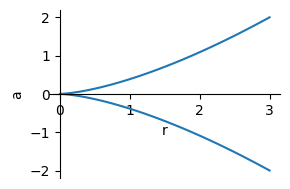

In [5]:
# Plot the curves of bifurcation points in ra-space
plot_parametric(( 3*x**2, -2*x**3), 
                (x,-1,1), 
                xlabel = 'r', 
                ylabel = 'a',
                size=(3,2))

## The Cusp Catastrophe Plotted in 3D
When the equilibrium condition $f(x,r,h)=0$ can be rearranged to solve for one parameter as a function of the others (for example, $h=g(x,r)$), we can visualize the solution set using a 3D plot or a 3D parametric plot. 

Both approaches represent the same surface: one in $(h,r,x)$ space and the other in $(x,r,h)$ space.  In practice one representation may produce a cleaner or more interpretable visualization than the other.


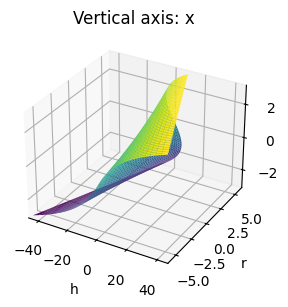

In [9]:
# 3D parametric plot of the cusp catastrophe surface
# The surface is defined by h = -r*x + x**3,
# with (r, x) used as parameters.

from sympy.plotting import plot3d_parametric_surface

plot3d_parametric_surface(
    -r*x + x**3,   # h = g(x, r)
    r,
    x,
    (x, -3, 3),
    (r, -6, 6),
    xlabel='h',
    ylabel='r',
    zlabel='x',  # zlabel doesn't work
    title='Vertical axis: x',
    size=(3,3)
)



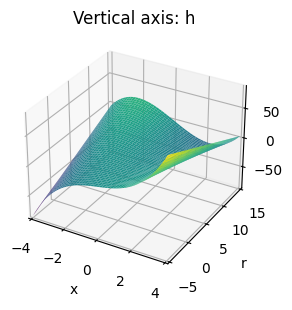

In [13]:
# 3D surface plot of the equilibrium surface
# h = -r*x + x^3, plotted as h(x, r)

from sympy.plotting import plot3d

plot3d(
    -r*x + x**3,
    (x, -4, 4),
    (r, -5, 15),
    xlabel='x',
    ylabel='r',
    zlabel='h',
    title='Vertical axis: h',
    size=(3, 3)
)

## Eigenvalues and Eigenvectors
Python can compute eigenvalues and eigenvectors symbolically, even for systems with unknown parameters. Use the functions `eigenvals` and `eigenvects` to obtain this information.

- `eigenvals` returns the eigenvalues along with their algebraic multiplicities.
- `eigenvects` returns the eigenvalues together with their multiplicities and corresponding eigenvectors.

Note: Python uses `j` to denote the imaginary unit $\sqrt{-1}$.


In [20]:
# Define a symbolic matrix and compute its eigenvalues and eigenvectors
A = sym.Matrix([[a, 2],
                [1, -1]])

# eigenvals() returns a dictionary: {eigenvalue : algebraic multiplicity}
print("Eigenvalues:")
for eig in A.eigenvals():
    print(eig)

# eigenvects() returns tuples of the form:
# (eigenvalue, algebraic multiplicity, [eigenvector(s)])
print("\nEigenvectors:")
for eig in A.eigenvects():
    print(eig)


Eigenvalues:
a/2 - sqrt(a**2 + 2*a + 9)/2 - 1/2
a/2 + sqrt(a**2 + 2*a + 9)/2 - 1/2

Eigenvectors:
(a/2 - sqrt(a**2 + 2*a + 9)/2 - 1/2, 1, [Matrix([
[a/2 - sqrt(a**2 + 2*a + 9)/2 + 1/2],
[                                 1]])])
(a/2 + sqrt(a**2 + 2*a + 9)/2 - 1/2, 1, [Matrix([
[a/2 + sqrt(a**2 + 2*a + 9)/2 + 1/2],
[                                 1]])])


In [21]:
B = sym.Matrix([[0, 2], [1, -1]])

print("Eigenvalues:")
for eig in B.eigenvals():
    print(eig)

# eigenvects() returns tuples of the form:
# (eigenvalue, algebraic multiplicity, [eigenvector(s)])
print("\nEigenvectors:")
for eig in B.eigenvects():
    print(eig)


Eigenvalues:
1
-2

Eigenvectors:
(-2, 1, [Matrix([
[-1],
[ 1]])])
(1, 1, [Matrix([
[2],
[1]])])


## Phase Portraits
Use `streamplot` to plot the trajectories of a phase portrait.
Fixed points must be added to the plot separately.

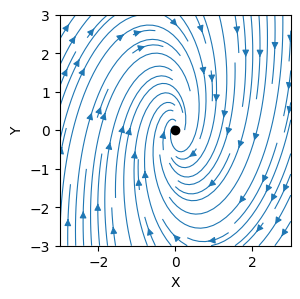

In [43]:
# Phase portrait using streamplot
import matplotlib.pyplot as plt
import numpy as np

# In np.mgrid the 'j' means to use 100 as the number of points (not the step size)
Y, X = np.mgrid[-3:3:100j, -3:3:100j] 

# define the flow
f_X = -X + Y
f_Y = -4*X - Y

# set the figure size and create axes
#   using ax allows us to add to a matplotlib plot
#   from another cell
p1, ax = plt.subplots(figsize=(3, 3))

# draw the trajectories
#  adjust density/linewidth so arrows/lines look nicer
ax.streamplot(X, Y, f_X, f_Y,
               density=1.0, linewidth=0.8, arrowsize=1)


# equal axis scaling
ax.set_aspect('equal')

# axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# fixed point at the origin
ax.plot(0,0, marker="o", markersize=6, 
         markerfacecolor="black", markeredgecolor='black')
# For an unstable fixed point, set markerfacecolor="none"
# Adjust the markersize based on your axis scaling.


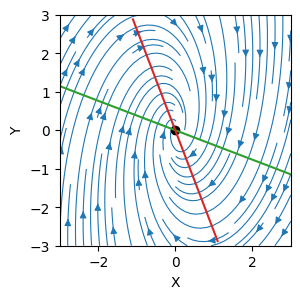

In [ ]:
# Add lines on the plot above by plotting to the same axes

y1 = np.linspace(-3,3,100)
y2 = np.linspace(-1.1,1.1,100)
ax.plot(y1, 0.5*(-3 + np.sqrt(5))*y1)
ax.plot(y2, 0.5*(-3 - np.sqrt(5))*y2)

# save the figure
p1.savefig('pset03-phaseportraitwithlines.png',bbox_inches='tight',dpi=150)

# explicitly display the combined plot in the notebook
from IPython.display import display
display(p1)
